In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect("user_behavior_analysis.sqlite")

Figure 1：Monthly New Users

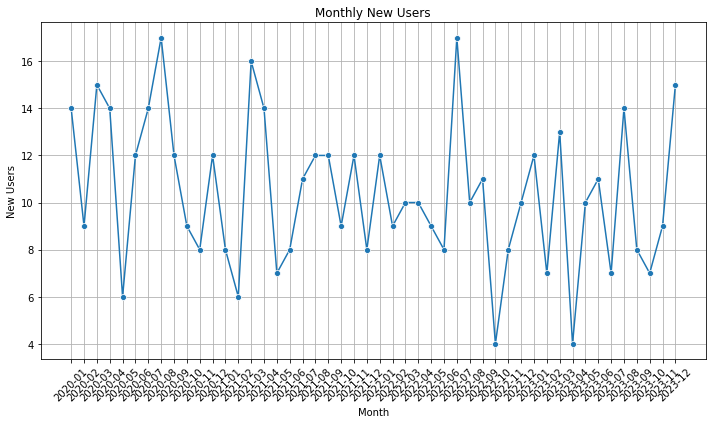

In [4]:
monthly_new_users = pd.read_sql_query("""
    SELECT strftime('%Y-%m', signup_date) AS month, COUNT(user_id) AS new_users
    FROM users
    GROUP BY month
    ORDER BY month;
""", conn)

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_new_users, x='month', y='new_users', marker='o')
plt.title('Monthly New Users')
plt.xlabel('Month')
plt.ylabel('New Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/monthly_new_users.png', dpi=300)
plt.show()

Figure 2：Monthly Active Users

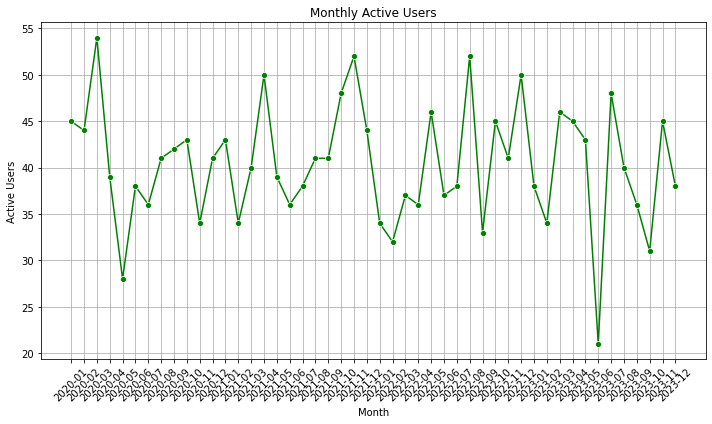

In [5]:
monthly_active_users = pd.read_sql_query("""
    SELECT strftime('%Y-%m', order_date) AS month, COUNT(DISTINCT user_id) AS active_users
    FROM orders
    GROUP BY month
    ORDER BY month;
""", conn)

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_active_users, x='month', y='active_users', marker='o', color='green')
plt.title('Monthly Active Users')
plt.xlabel('Month')
plt.ylabel('Active Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/monthly_active_users.png', dpi=300)
plt.show()

Figure 3：Monthly Sales Trend

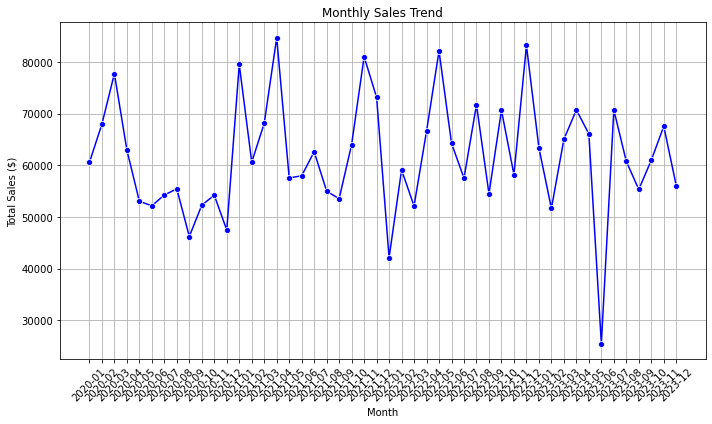

In [6]:
monthly_sales = pd.read_sql_query("""
    SELECT strftime('%Y-%m', o.order_date) AS month,
           ROUND(SUM(oi.quantity * p.price), 2) AS total_sales
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    JOIN products p ON oi.product_id = p.product_id
    GROUP BY month
    ORDER BY month;
""", conn)

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='month', y='total_sales', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/monthly_sales.png', dpi=300)
plt.show()

Figure 4：Total Sales by Product Category

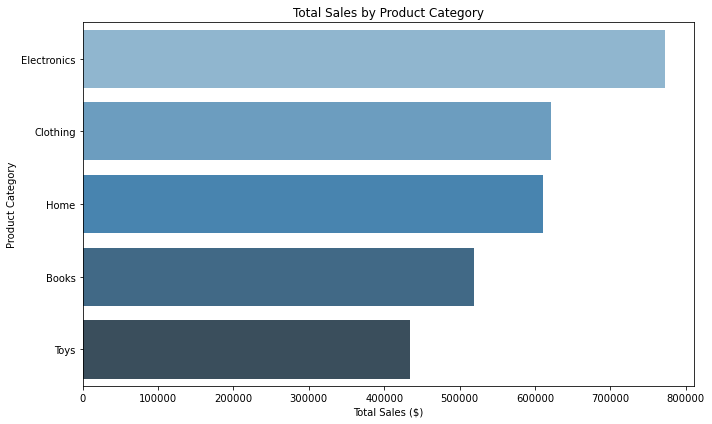

In [7]:
category_sales = pd.read_sql_query("""
    SELECT p.category, ROUND(SUM(oi.quantity * p.price), 2) AS total_sales
    FROM products p
    JOIN order_items oi ON p.product_id = oi.product_id
    GROUP BY p.category
    ORDER BY total_sales DESC;
""", conn)

plt.figure(figsize=(10,6))
sns.barplot(data=category_sales, x='total_sales', y='category', palette='Blues_d')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.savefig('plots/category_sales.png', dpi=300)
plt.show()

Figure 5：Average Orders and Spending per User

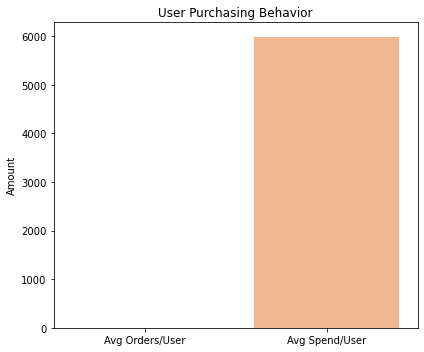

In [8]:
user_orders = pd.read_sql_query("""
    SELECT user_id, COUNT(order_id) AS order_count
    FROM orders
    GROUP BY user_id;
""", conn)

user_spending = pd.read_sql_query("""
    SELECT o.user_id, ROUND(SUM(oi.quantity * p.price), 2) AS total_spent
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    JOIN products p ON oi.product_id = p.product_id
    GROUP BY o.user_id;
""", conn)

avg_orders = user_orders['order_count'].mean()
avg_spent = user_spending['total_spent'].mean()

plt.figure(figsize=(6,5))
sns.barplot(x=['Avg Orders/User', 'Avg Spend/User'], y=[avg_orders, avg_spent], palette='pastel')
plt.title('User Purchasing Behavior')
plt.ylabel('Amount')
plt.tight_layout()
plt.savefig('plots/user_behavior.png', dpi=300)
plt.show()

Figure 6: User Repurchase Rate

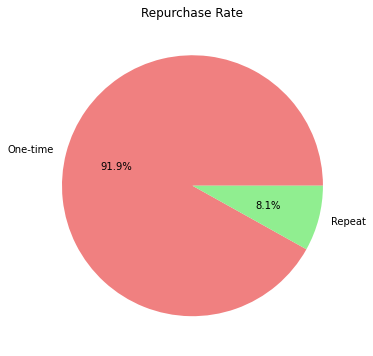

In [9]:
repurchase_data = pd.read_sql_query("""
    SELECT user_id, COUNT(order_id) AS order_count
    FROM orders
    GROUP BY user_id;
""", conn)

repurchase_data['repurchased'] = repurchase_data['order_count'] > 1
rate = repurchase_data['repurchased'].value_counts(normalize=True)

plt.figure(figsize=(6,6))
plt.pie(rate, labels=['One-time', 'Repeat'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Repurchase Rate')
plt.savefig('plots/repurchase_rate.png', dpi=300)
plt.show()

Figure 7: Top 10 Best-Selling Products

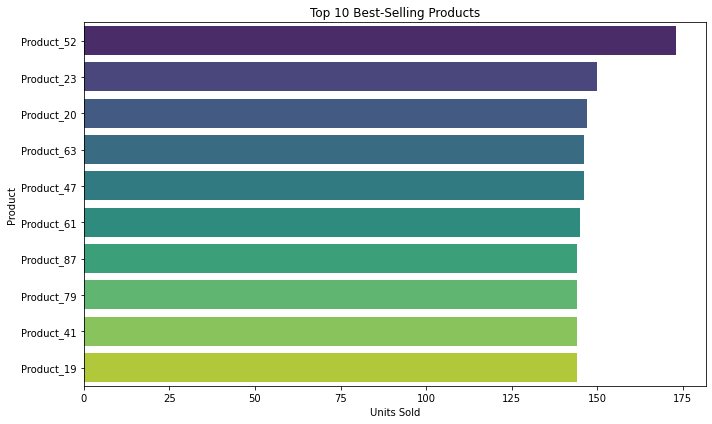

In [10]:
top_products = pd.read_sql_query("""
    SELECT p.product_name, SUM(oi.quantity) AS total_quantity
    FROM order_items oi
    JOIN products p ON oi.product_id = p.product_id
    GROUP BY p.product_id
    ORDER BY total_quantity DESC
    LIMIT 10;
""", conn)

plt.figure(figsize=(10,6))
sns.barplot(data=top_products, y='product_name', x='total_quantity', palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Units Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.savefig('plots/top_products.png', dpi=300)
plt.show()

Figure 8: Bottom 10 Least-Selling Products

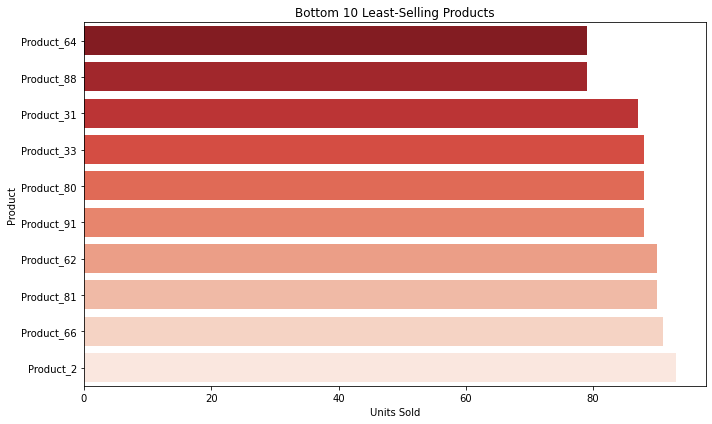

In [11]:
worst_products = pd.read_sql_query("""
    SELECT p.product_name, SUM(oi.quantity) AS total_quantity
    FROM order_items oi
    JOIN products p ON oi.product_id = p.product_id
    GROUP BY p.product_id
    ORDER BY total_quantity ASC
    LIMIT 10;
""", conn)

plt.figure(figsize=(10,6))
sns.barplot(data=worst_products, y='product_name', x='total_quantity', palette='Reds_r')
plt.title('Bottom 10 Least-Selling Products')
plt.xlabel('Units Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.savefig('plots/worst_products.png', dpi=300)
plt.show()

Figure 9: Top 10 High-Value Users by Total Spending

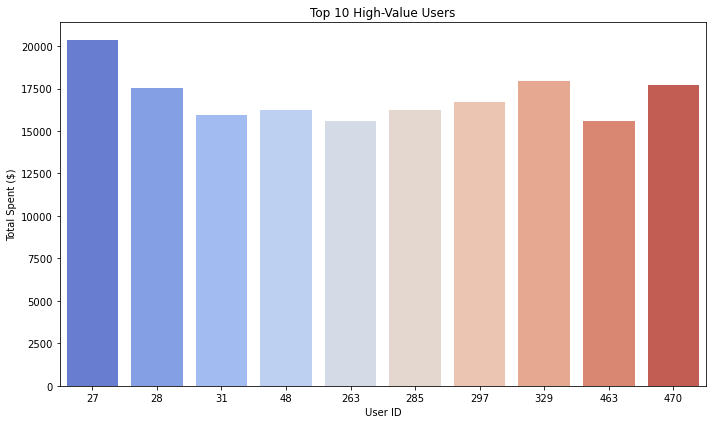

In [12]:
top_users = pd.read_sql_query("""
    SELECT o.user_id, ROUND(SUM(oi.quantity * p.price), 2) AS total_spent
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    JOIN products p ON oi.product_id = p.product_id
    GROUP BY o.user_id
    ORDER BY total_spent DESC
    LIMIT 10;
""", conn)

plt.figure(figsize=(10,6))
sns.barplot(data=top_users, x='user_id', y='total_spent', palette='coolwarm')
plt.title('Top 10 High-Value Users')
plt.xlabel('User ID')
plt.ylabel('Total Spent ($)')
plt.tight_layout()
plt.savefig('plots/top_users.png', dpi=300)
plt.show()

Figure 10: User Lifetime Value Distribution

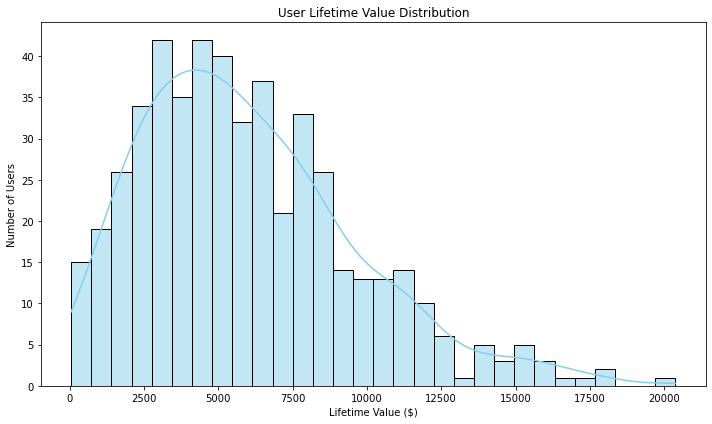

In [13]:
user_ltv = user_spending['total_spent']

plt.figure(figsize=(10,6))
sns.histplot(user_ltv, bins=30, color='skyblue', kde=True)
plt.title('User Lifetime Value Distribution')
plt.xlabel('Lifetime Value ($)')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.savefig('plots/ltv_distribution.png', dpi=300)
plt.show()